# Task 3.2 Construct Parametriezed Circuits

## Objective 1: Parameter

In Qiskit, the `Parameter` class allows you to create symbolic variables that can be used in quantum circuits. These parameters remain unbound until circuit execution, enabling the creation of parameterized quantum circuits.

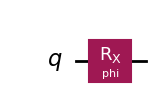

In [49]:
from qiskit.circuit import QuantumCircuit, Parameter
import numpy as np
 
# create the parameter  symbolic variable named 'phi' 
phi = Parameter('phi')
qc = QuantumCircuit(1)
 
# use parameter in place of numeric values in quantum gates
# The circuit remains unbound until parameters are assigned
qc.rx(phi, 0)
qc.draw('mpl')

The parameters are then assigned values after the circuit is created. The same ciruict can then be run multiple times with different parameter values.

Parameterized circuit:
phi = π


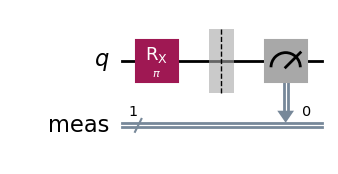

In [50]:
# bind the parameters after circuit to create a bound circuit
qc = qc.assign_parameters({phi: np.pi})
qc.measure_all()
print("Parameterized circuit:")
print("phi = π")
qc.draw('mpl')

### Attributes

* name : Parameter name
* uuid : Parameter identifier

In [38]:
print(f"Parameter name: {phi.name}")
print(f"Parameter UUID: {phi.uuid}")

Parameter name: phi
Parameter UUID: 79f0f78f-8d34-451c-bebb-75aaed476289


### Methods

* abs
* arccos
* arcsin
* arctan
* assign
* bind
* conjugate
* cos
* exp
* gradient
* is_real
* log
* numeric
* sign
* sin
* subs
* sympify
* tan

In [28]:
print(f"Sin: {phi.sin()}")
print(f"Cos: {phi.cos()}")
print(f"tan: {phi.tan()}")

Sin: sin(phi)
Cos: cos(phi)
tan: tan(phi)


## Objective 2: Quantum Circuit

The `QuantumCircuit` class is a fundamental building block for quantum programs in Qiskit. It represents a collection of quantum gates and operations.

Parameters can be used across different qubits and gate types, additionally Circuits can contain multiple different parameters

The example below shows a circuit with multiple parameters, to get all unbound parameters in a circuit, you can use `parameters` attribute.

Multi-parameter circuit:
Circuit parameters: ParameterView([Parameter(γ), Parameter(θ)])


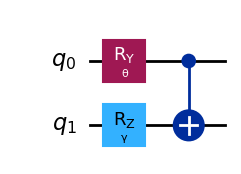

In [32]:
# Create a multi-parameter circuit
theta = Parameter('θ')
gamma = Parameter('γ')

qc2 = QuantumCircuit(2)
qc2.ry(theta, 0)
qc2.rz(gamma, 1)
qc2.cx(0, 1)

print("Multi-parameter circuit:")
print(f"Circuit parameters: {qc2.parameters}")
qc2.draw('mpl')


Use ```dict``` types to bind multiple parameters to values

Bound circuit values:
theta = π/2, gamma = π/4


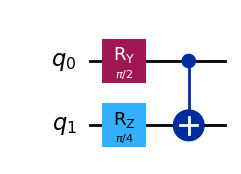

In [44]:
# Multiple ways to bind parameters
param_dict = {theta: np.pi/2, gamma: np.pi/4}

# assign_parameters (returns new circuit)
bound_circuit = qc2.assign_parameters(param_dict)


print("Bound circuit values:")
print(f"theta = π/2, gamma = π/4")
bound_circuit.draw('mpl')

## Objective 3: Parmater Expression

`ParameterExpression` enables creating mathematical expressions of Parameters, allowing complex parameter relationships and constraints. they are created using standard mathematical operations, additionally expressions can include trigonometric functions, logarithms, and other operations

In [51]:
from qiskit.circuit import Parameter

# Create base parameters
x = Parameter('x')
y = Parameter('y')

# Create mathematical expressions
expr1 = x + y
expr2 = 2 * x - y**2
expr3 = np.sin(x) + np.cos(y)

print(f"Expression 1: {expr1}")
print(f"Expression 2: {expr2}")
print(f"Expression 3: {expr3}")
print(f"Parameters in expr1: {expr1.parameters}")

Expression 1: x + y
Expression 2: 2*x - y**2
Expression 3: sin(x) + cos(y)
Parameters in expr1: dict_keys([Parameter(x), Parameter(y)])


Parameter expressions can be then used directly in quantum gates, as the circuit will automatically extracts all base parameters from expressions, and this enables creating the circuit with dependent parameters

Circuit with parameter expressions:
All parameters: ParameterView([Parameter(α), Parameter(β)])


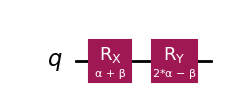

In [ ]:
# Create circuit using parameter expressions
alpha = Parameter('α')
beta = Parameter('β')

expr = 2 * alpha - beta

qc3 = QuantumCircuit(1)
qc3.rx(alpha + beta, 0)  # Use parameters as an expression  as rotation angle
qc3.ry(expr, 0) # Use created expression

print("Circuit with parameter expressions:")
print(f"All parameters: {qc3.parameters}")
qc3.draw('mpl')


More Complex expressions can be created, in this case ```bind()``` method is used to assign the parameter values to the expressions

In [57]:
# Create and evaluate complex expressions
expr = (x + y) * np.cos(x) - y**2
print(f"Complex expression: {expr}")

# Bind parameters and evaluate
param_values = {x: 1.0, y: 2.0}
bound_expr = expr.bind(param_values)
numeric_value = float(bound_expr)

print(f"Bound expression: {bound_expr}")
print(f"Numeric value: {numeric_value}")

Complex expression: -y**2 + (x + y)*cos(x)
Bound expression: -2.37909308239558
Numeric value: -2.3790930823955807
